# Setup


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

import os
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

# read data

DATA_DIR = "data"
train_data = pd.read_csv(os.path.join(DATA_DIR, "train.csv"))
train_pair = train_data[["user_id", "item_id"]].values
train_rating = train_data[["rating"]].values
test_data = pd.read_csv(os.path.join(DATA_DIR, "test.csv"))
test = test_data[["user_id", "item_id"]].values
user_feats = pd.read_csv(os.path.join(DATA_DIR, "user_feats.csv"))
item_feats = pd.read_csv(os.path.join(DATA_DIR, "item_feats.csv"))

# Exploratory Data Analysis


In [2]:
# data types
print("Training data:")
print(train_data.head())
print(train_data.dtypes)
print()
print("Test data:")
print(test_data.head())
print(test_data.dtypes)

Training data:
   user_id  item_id    rating
0       16       19  2.827834
1       16      245  2.894483
2        8      186  3.272811
3       37      136  4.162128
4       54       10  4.766408
user_id      int64
item_id      int64
rating     float64
dtype: object

Test data:
   user_id  item_id
0       41       82
1       99      240
2       41      206
3       43      244
4       56      146
user_id    int64
item_id    int64
dtype: object


In [3]:
# number of users and items
num_user = max(train_data["user_id"].max(), test_data["user_id"].max()) + 1
num_item = max(train_data["item_id"].max(), test_data["item_id"].max()) + 1
print(f"{num_user=}")
print(f"{num_item=}")

num_user=100
num_item=300


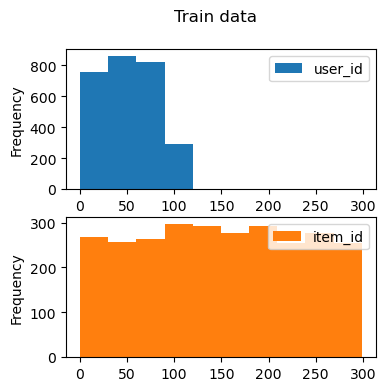

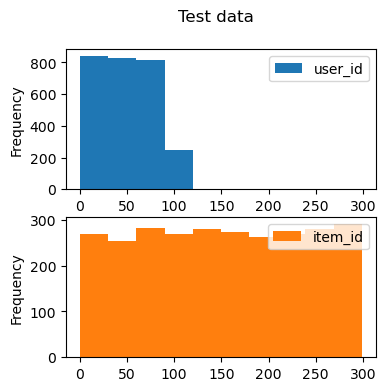

array([<Axes: xlabel='Train data rating', ylabel='Frequency'>],
      dtype=object)

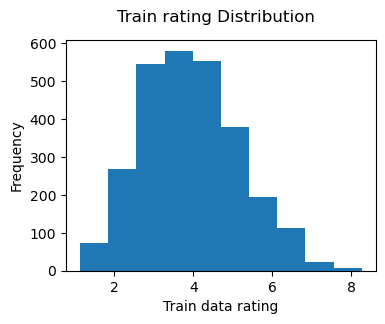

In [4]:
# separating user_id and item_id from ratings since there scales are different
train_data[["user_id", "item_id"]].plot(
    kind="hist",
    subplots=True,
    sharex=False,
    sharey=False,
    title="Train data",
    figsize=(4, 4),
)
test_data.plot(
    kind="hist",
    subplots=True,
    sharex=False,
    sharey=False,
    title="Test data",
    figsize=(4, 4),
)
plt.show()
train_data["rating"].plot(
    kind="hist",
    subplots=True,
    xlabel="Train data rating",
    figsize=(4, 3),
    title="Train rating Distribution",
)

<Axes: xlabel='item_id', ylabel='rating'>

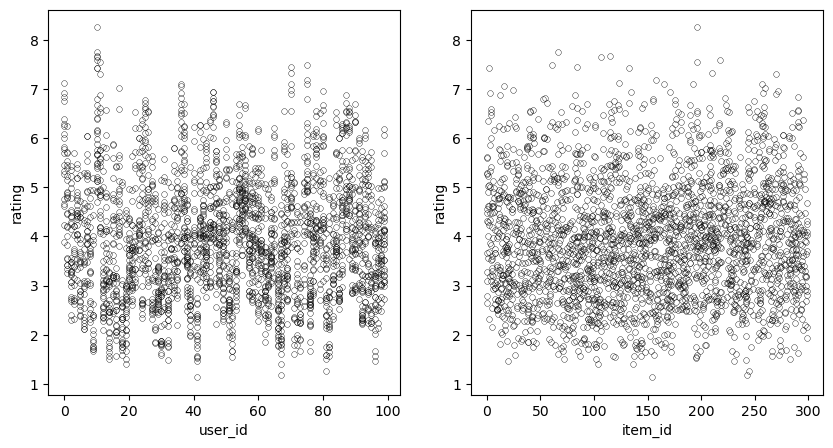

In [5]:
# Scatter plots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
train_data[["user_id", "rating"]].plot(
    kind="scatter",
    x="user_id",
    y="rating",
    marker="$\u25EF$",
    color="black",
    s=20,
    linewidth=0,
    ax=axes[0],
)
train_data[["item_id", "rating"]].plot(
    kind="scatter",
    x="item_id",
    y="rating",
    marker="$\u25EF$",
    color="black",
    s=20,
    linewidth=0,
    ax=axes[1],
)

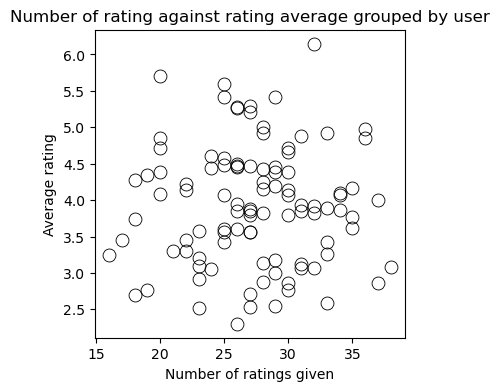

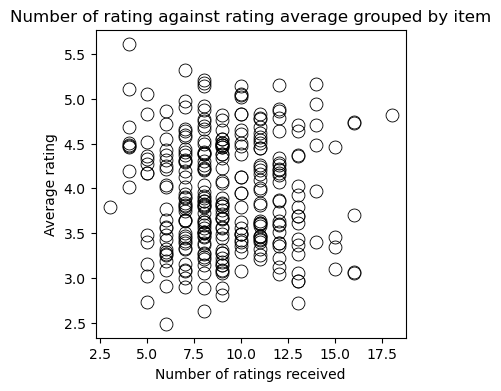

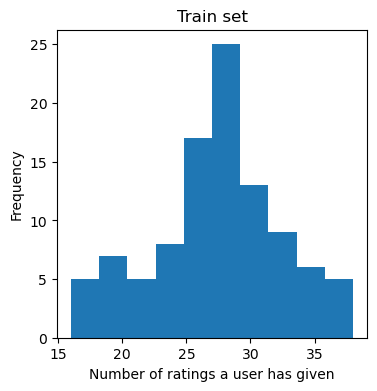

Text(0.5, 0, 'Number of ratings a user has given')

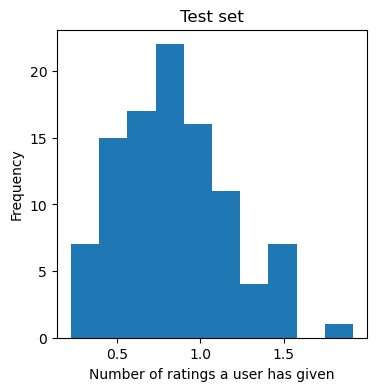

In [6]:
ax = (
    train_data[["user_id", "rating"]]
    .groupby("user_id")
    .aggregate(["mean", "count"])
    .plot(
        kind="scatter",
        x=("rating", "count"),
        y=("rating", "mean"),
        title="Number of rating against rating average grouped by user",
        marker="$\u25EF$",
        color="black",
        s=100,
        linewidth=0,
        figsize=(4, 4),
    )
)
ax.set_xlabel("Number of ratings given")
ax.set_ylabel("Average rating")
ax2 = (
    train_data[["item_id", "rating"]]
    .groupby("item_id")
    .aggregate(["mean", "count"])
    .plot(
        kind="scatter",
        x=("rating", "count"),
        y=("rating", "mean"),
        title="Number of rating against rating average grouped by item",
        marker="$\u25EF$",
        color="black",
        s=100,
        linewidth=0,
        figsize=(4, 4),
    )
)
ax2.set_xlabel("Number of ratings received")
ax2.set_ylabel("Average rating")
plt.show()
ax3 = train_data["user_id"].value_counts().plot(kind="hist", figsize=(4, 4))
ax3.set_title("Train set")
ax3.set_xlabel("Number of ratings a user has given")
plt.show()
ax4 = (
    train_data[["user_id", "rating"]]
    .groupby("user_id")["rating"]
    .var()
    .plot(kind="hist", figsize=(4, 4))
)
ax4.set_title("Test set")
ax4.set_xlabel("Number of ratings a user has given")

<Axes: >

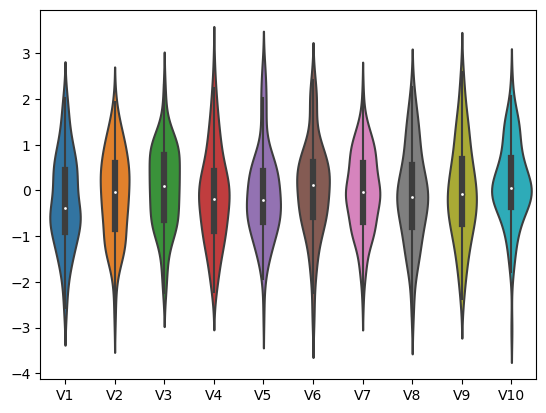

In [7]:
# User side information violinplots
sns.violinplot(user_feats.drop("user_id", axis=1))

In [8]:
item_feats.describe()

,item_id,V1,V2,V3,V4
count,300.000000,300.000000,300.00000,300.000000,300.000000
mean,149.500000,4.470000,4.58000,4.573333,4.590000
std,86.746758,2.821756,2.83379,2.800733,2.960481
min,0.000000,0.000000,0.00000,0.000000,0.000000
25%,74.750000,2.000000,2.00000,2.000000,2.000000
50%,149.500000,5.000000,5.00000,5.000000,5.000000
75%,224.250000,7.000000,7.00000,7.000000,7.000000
max,299.000000,9.000000,9.00000,9.000000,9.000000


<Axes: ylabel='Count'>

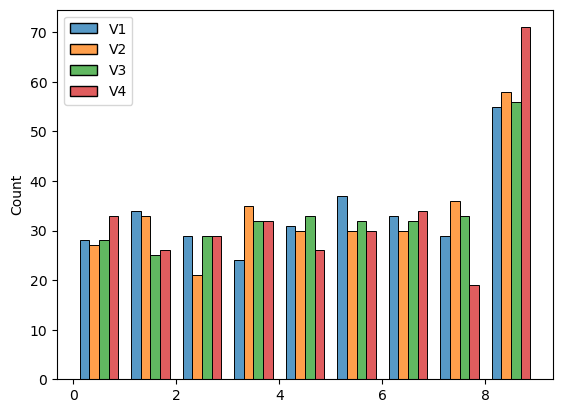

In [9]:
# Item side information histogram plots
sns.histplot(
    item_feats.drop("item_id", axis=1),
    multiple="dodge",
    bins=9,
    shrink=0.75,
)

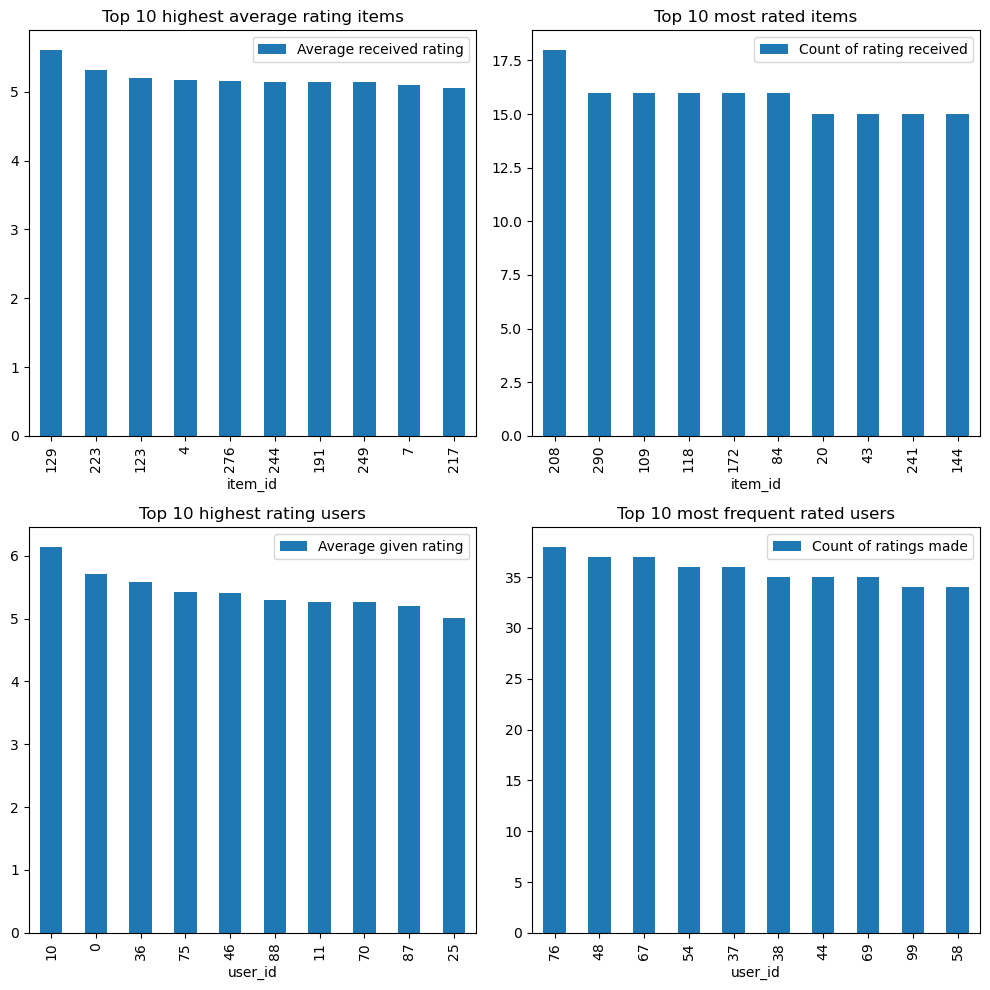

In [10]:
TOP_K = 10

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()
train_data[["item_id", "rating"]].groupby("item_id").mean().sort_values(
    "rating", ascending=False
).head(TOP_K).plot(
    kind="bar", ax=axes[0], title=f"Top {TOP_K} highest average rating items"
)
axes[0].legend(labels=["Average received rating"])

train_data[["item_id", "rating"]].groupby("item_id").count().sort_values(
    "rating", ascending=False
).head(TOP_K).plot(kind="bar", ax=axes[1], title=f"Top {TOP_K} most rated items")
axes[1].legend(labels=["Count of rating received"])

train_data[["user_id", "rating"]].groupby("user_id").mean().sort_values(
    "rating", ascending=False
).head(TOP_K).plot(kind="bar", ax=axes[2], title=f"Top {TOP_K} highest rating users")
axes[2].legend(labels=["Average given rating"])

train_data[["user_id", "rating"]].groupby("user_id").count().sort_values(
    "rating", ascending=False
).head(TOP_K).plot(
    kind="bar", ax=axes[3], title=f"Top {TOP_K} most frequent rated users"
)
axes[3].legend(labels=["Count of ratings made"])
fig.tight_layout()

In [11]:
class MF(object):
    def __init__(
        self, n_user, n_item, lam=0.001, K=10, iterNum=50, tol=1e-4, verbose=1
    ):
        self.P = np.random.randn(n_user, K)
        self.Q = np.random.randn(n_item, K)
        # self.index_item = []
        # self.index_user = []
        self.n_user = n_user
        self.n_item = n_item
        self.lam = lam
        self.K = K
        self.iterNum = iterNum
        self.tol = tol
        self.verbose = verbose

    def fit(self, train_pair, train_rating):
        diff, tol = 1.0, self.tol
        n_user, n_item, n_obs = self.n_user, self.n_item, len(train_pair)
        K, iterNum, lam = self.K, self.iterNum, self.lam
        ## store user/item index set
        self.index_item = [np.where(train_pair[:, 1] == i)[0] for i in range(n_item)]
        self.index_user = [np.where(train_pair[:, 0] == u)[0] for u in range(n_user)]

        if self.verbose:
            print("Fitting Reg-MF: K: %d, lam: %.5f" % (K, lam))

        for i in range(iterNum):
            ## item update
            obj_old = self.obj(test_pair=train_pair, test_rating=train_rating)
            for item_id in range(n_item):
                index_item_tmp = self.index_item[item_id]
                if len(index_item_tmp) == 0:
                    self.Q[item_id, :] = 0.0
                    continue
                ## compute `sum_pu` and `sum_matrix`
                sum_pu, sum_matrix = np.zeros((K)), np.zeros((K, K))
                for record_ind in index_item_tmp:
                    ## double-check
                    if item_id != train_pair[record_ind][1]:
                        raise ValueError("the item_id is worning in updating Q!")
                    user_id, rating_tmp = (
                        train_pair[record_ind][0],
                        train_rating[record_ind],
                    )
                    sum_matrix = sum_matrix + np.outer(
                        self.P[user_id, :], self.P[user_id, :]
                    )
                    sum_pu = sum_pu + rating_tmp * self.P[user_id, :]
                self.Q[item_id, :] = np.dot(
                    np.linalg.inv(sum_matrix + lam * n_obs * np.identity(K)), sum_pu
                )

            for user_id in range(n_user):
                index_user_tmp = self.index_user[user_id]
                if len(index_user_tmp) == 0:
                    self.P[user_id, :] = 0.0
                    continue
                ## compute `sum_qi` and `sum_matrix`
                sum_qi, sum_matrix = np.zeros((K)), np.zeros((K, K))
                for record_ind in index_user_tmp:
                    ## double-check
                    if user_id != train_pair[record_ind][0]:
                        raise ValueError("the user_id is worning in updating P!")
                    item_id, rating_tmp = (
                        train_pair[record_ind][1],
                        train_rating[record_ind],
                    )
                    sum_matrix = sum_matrix + np.outer(
                        self.Q[item_id, :], self.Q[item_id, :]
                    )
                    sum_qi = sum_qi + rating_tmp * self.Q[item_id, :]
                self.P[user_id, :] = np.dot(
                    np.linalg.inv(sum_matrix + lam * n_obs * np.identity(K)), sum_qi
                )
            # compute the new rmse score
            obj_new = self.obj(test_pair=train_pair, test_rating=train_rating)
            diff = abs(obj_new - obj_old) / obj_old
            if self.verbose:
                print("Reg-MF: ite: %d; diff: %.3f Obj: %.3f" % (i, diff, obj_new))
            if diff < tol:
                break

    def predict(self, test_pair):
        # predict ratings for user-item pairs
        pred_rating = [np.dot(self.P[line[0]], self.Q[line[1]]) for line in test_pair]
        return np.array(pred_rating)

    def rmse(self, test_pair, test_rating):
        # report the rmse for the fitted `MF`
        pred_rating = self.predict(test_pair=test_pair)
        return np.sqrt(np.mean((pred_rating - test_rating) ** 2))

    def obj(self, test_pair, test_rating):
        return (
            (self.rmse(test_pair, test_rating)) ** 2
            + self.lam * np.sum(self.P**2)
            + self.lam * np.sum(self.Q**2)
        )

Fitting Reg-MF: K: 2, lam: 0.00100
Reg-MF: ite: 0; diff: 0.305 Obj: 14.255
Reg-MF: ite: 1; diff: 0.370 Obj: 8.977
Reg-MF: ite: 2; diff: 0.551 Obj: 4.027
Reg-MF: ite: 3; diff: 0.039 Obj: 3.868
Reg-MF: ite: 4; diff: 0.001 Obj: 3.870
Reg-MF: ite: 5; diff: 0.001 Obj: 3.874
Reg-MF: ite: 6; diff: 0.000 Obj: 3.875


[Text(0.5, 1.0, 'Item latent space')]

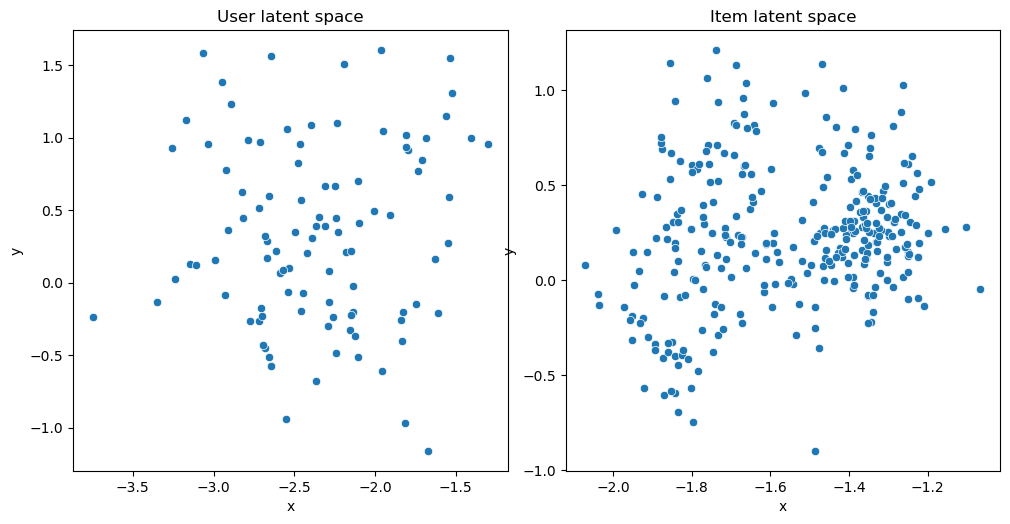

In [12]:
mf = MF(num_user, num_item, K=2)
mf.fit(train_pair, train_rating)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

plt.tight_layout()
sns.scatterplot(
    pd.DataFrame({"x": mf.P[:, 0], "y": mf.P[:, 1]}), x="x", y="y", ax=axes[0]
)
axes[0].set(title="User latent space")
sns.scatterplot(
    pd.DataFrame({"x": mf.Q[:, 0], "y": mf.Q[:, 1]}), x="x", y="y", ax=axes[1]
)
axes[1].set(title="Item latent space")

In [13]:
# computer the element wise product
user_feats_transformed = user_feats.copy()
for i in range(10):
    user_feats_transformed[f"V{i+1}^2"] = user_feats[f"V{i+1}"] ** 2
user_feats_transformed

,user_id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V1^2,V2^2,V3^2,V4^2,V5^2,V6^2,V7^2,V8^2,V9^2,V10^2
0,0,1.764052,0.400157,0.978738,2.240893,1.867558,-0.977278,0.950088,-0.151357,-0.103219,...,3.111881,0.160126,0.957928,5.021602,3.487773,0.955072,0.902668,0.022909,0.010654,0.168591
1,1,0.144044,1.454274,0.761038,0.121675,0.443863,0.333674,1.494079,-0.205158,0.313068,...,0.020749,2.114911,0.579178,0.014805,0.197015,0.111339,2.232272,0.042090,0.098011,0.729480
2,2,-2.552990,0.653619,0.864436,-0.742165,2.269755,-1.454366,0.045759,-0.187184,1.532779,...,6.517757,0.427217,0.747250,0.550809,5.151786,2.115180,0.002094,0.035038,2.349412,2.159015
3,3,0.154947,0.378163,-0.887786,-1.980796,-0.347912,0.156349,1.230291,1.202380,-0.387327,...,0.024009,0.143007,0.788164,3.923555,0.121043,0.024445,1.513615,1.445717,0.150022,0.091387
4,4,-1.048553,-1.420018,-1.706270,1.950775,-0.509652,-0.438074,-1.252795,0.777490,-1.613898,...,1.099463,2.016451,2.911358,3.805525,0.259745,0.191909,1.569496,0.604491,2.604666,0.045258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,-0.947489,0.244443,1.401345,-0.410382,0.528944,0.246148,0.863520,-0.804754,2.346647,...,0.897735,0.059753,1.963767,0.168413,0.279781,0.060589,0.745666,0.647629,5.506752,1.636253
96,96,-0.365551,0.938093,0.296733,0.829986,-0.496102,-0.074805,0.012232,1.569260,0.690429,...,0.133628,0.880018,0.088051,0.688877,0.246118,0.005596,0.000150,2.462576,0.476692,0.634686
97,97,-0.657926,0.968883,0.225582,1.389145,2.014060,-0.306766,-0.406303,-0.864045,-0.143580,...,0.432867,0.938734,0.050887,1.929725,4.056438,0.094105,0.165082,0.746574,0.020615,0.145943
98,98,0.359504,-0.144567,-0.361599,1.064585,-0.937880,0.433108,-0.405942,0.724369,1.385262,...,0.129243,0.020900,0.130754,1.133342,0.879619,0.187582,0.164789,0.524710,1.918950,0.091869


In [14]:
# merge data
merged_train = pd.merge(
    pd.merge(
        train_data,
        user_feats_transformed,
        on="user_id",
    ),
    item_feats,
    on="item_id",
    suffixes=("", "_item"),
)
merged_train_data = merged_train.drop("rating", axis=1).values
merged_train_rating = merged_train[["rating"]].values
merged_test_data = pd.merge(
    pd.merge(
        test_data,
        user_feats_transformed,
        on="user_id",
    ),
    item_feats,
    on="item_id",
    suffixes=("", "_item"),
).values

In [15]:
merged_train

,user_id,item_id,rating,V1,V2,V3,V4,V5,V6,V7,...,V5^2,V6^2,V7^2,V8^2,V9^2,V10^2,V1_item,V2_item,V3_item,V4_item
0,16,19,2.827834,-0.498032,1.929532,0.949421,0.087551,-1.225436,0.844363,-1.000215,...,1.501692,0.712949,1.000431,2.386318,1.411415,0.100453,1,9,7,5
1,37,19,5.514228,0.280442,-0.993124,0.841631,-0.249459,0.049495,0.493837,0.643314,...,0.002450,0.243875,0.413854,2.466858,0.042809,0.774715,1,9,7,5
2,86,19,5.424720,1.154184,0.172504,0.021062,0.099454,0.227393,-1.016739,-0.114775,...,0.051707,1.033757,0.013173,0.095327,1.878983,0.749355,1,9,7,5
3,30,19,1.861854,-1.306527,1.658131,-0.118164,-0.680178,0.666383,-0.460720,-1.334258,...,0.444066,0.212263,1.780246,1.813648,0.481321,0.025464,1,9,7,5
4,72,19,3.763522,-0.386871,-0.510293,0.183925,-0.385490,-1.601836,-0.887181,-0.932789,...,2.565879,0.787090,0.870095,1.545843,0.660439,0.344874,1,9,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2726,67,153,3.925757,-0.545712,-1.884586,-1.945703,-0.912783,0.219510,0.393063,-0.938982,...,0.048184,0.154498,0.881686,1.034332,2.024882,0.156885,3,4,5,8
2727,52,153,1.675867,-0.222606,-0.913079,-1.681218,-0.888971,0.242118,-0.888720,0.936742,...,0.058621,0.789824,0.877486,1.994670,5.614942,0.746586,3,4,5,8
2728,28,153,4.417084,-0.110541,1.020173,-0.692050,1.536377,0.286344,0.608844,-1.045253,...,0.081993,0.370691,1.092555,1.466873,0.475849,1.694804,3,4,5,8
2729,34,153,3.586143,1.068509,-0.453386,-0.687838,-1.214077,-0.440923,-0.280355,-0.364694,...,0.194413,0.078599,0.133001,0.024556,0.334687,0.122258,3,4,5,8


In [16]:
merged_test_data

array([[41.        , 82.        , -1.4465347 , ...,  5.        ,
         9.        ,  2.        ],
       [43.        , 82.        , -0.46684555, ...,  5.        ,
         9.        ,  2.        ],
       [98.        , 82.        ,  0.3595044 , ...,  5.        ,
         9.        ,  2.        ],
       ...,
       [75.        , 58.        ,  0.77269484, ...,  2.        ,
         4.        ,  4.        ],
       [ 5.        , 58.        , -0.89546656, ...,  2.        ,
         4.        ,  4.        ],
       [ 6.        , 58.        , -0.67246045, ...,  2.        ,
         4.        ,  4.        ]])

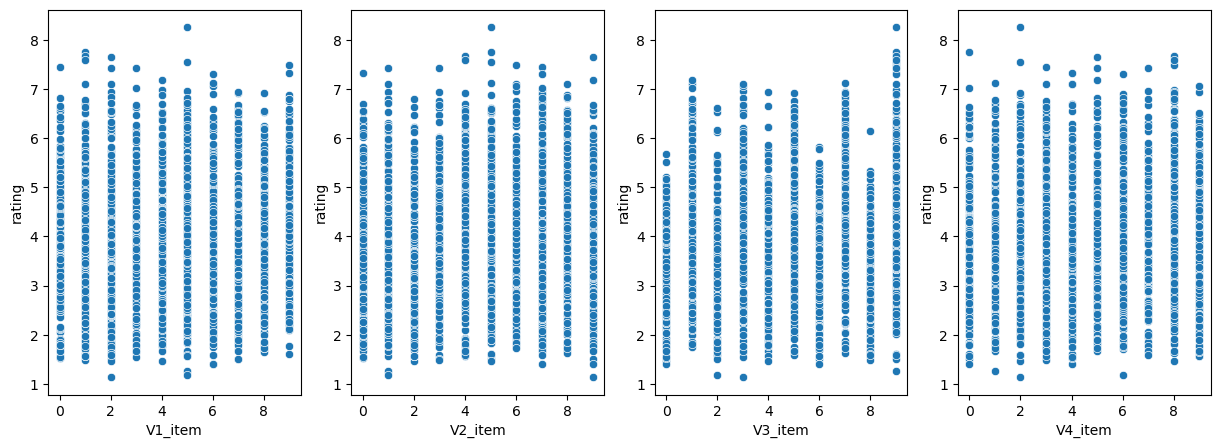

In [17]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
for i in range(4):
    sns.scatterplot(merged_train, x=f"V{i+1}_item", y="rating", ax=axes[i])

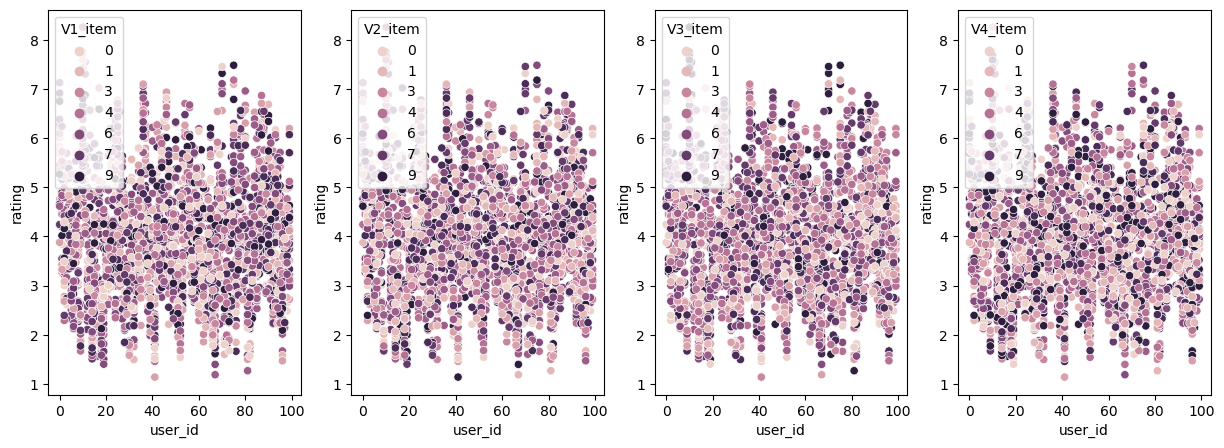

In [18]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
for i in range(4):
    sns.scatterplot(
        merged_train, x="user_id", hue=f"V{i+1}_item", y="rating", ax=axes[i]
    )

Fitting Reg-MF: K: 2, lam: 0.00100
Reg-MF: ite: 0; diff: 0.765 Obj: 4.595
Reg-MF: ite: 1; diff: 0.380 Obj: 2.851
Reg-MF: ite: 2; diff: 0.059 Obj: 2.683
Reg-MF: ite: 3; diff: 0.048 Obj: 2.554
Reg-MF: ite: 4; diff: 0.039 Obj: 2.454
Reg-MF: ite: 5; diff: 0.033 Obj: 2.374
Reg-MF: ite: 6; diff: 0.027 Obj: 2.309
Reg-MF: ite: 7; diff: 0.023 Obj: 2.255
Reg-MF: ite: 8; diff: 0.020 Obj: 2.210
Reg-MF: ite: 9; diff: 0.017 Obj: 2.172
Reg-MF: ite: 10; diff: 0.015 Obj: 2.139
Reg-MF: ite: 11; diff: 0.013 Obj: 2.111
Reg-MF: ite: 12; diff: 0.012 Obj: 2.086
Reg-MF: ite: 13; diff: 0.010 Obj: 2.065
Reg-MF: ite: 14; diff: 0.009 Obj: 2.046
Reg-MF: ite: 15; diff: 0.008 Obj: 2.029
Reg-MF: ite: 16; diff: 0.007 Obj: 2.015
Reg-MF: ite: 17; diff: 0.006 Obj: 2.002
Reg-MF: ite: 18; diff: 0.006 Obj: 1.991
Reg-MF: ite: 19; diff: 0.005 Obj: 1.981
Reg-MF: ite: 20; diff: 0.005 Obj: 1.972
Reg-MF: ite: 21; diff: 0.004 Obj: 1.964
Reg-MF: ite: 22; diff: 0.004 Obj: 1.957
Reg-MF: ite: 23; diff: 0.003 Obj: 1.950
Reg-MF: ite: 24

[Text(0.5, 1.0, 'Item latent space')]

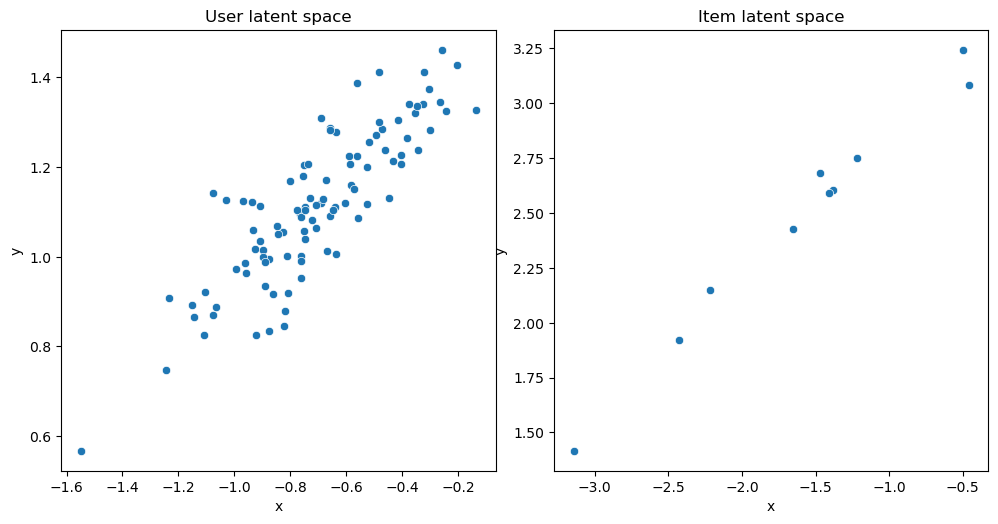

In [19]:
latent_pair = merged_train[["user_id", "V1_item"]].values
mf = MF(num_user, 10, K=2)
mf.fit(latent_pair, train_rating)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

plt.tight_layout()
sns.scatterplot(
    pd.DataFrame({"x": mf.P[:, 0], "y": mf.P[:, 1]}), x="x", y="y", ax=axes[0]
)
axes[0].set(title="User latent space")
sns.scatterplot(
    pd.DataFrame({"x": mf.Q[:, 0], "y": mf.Q[:, 1]}), x="x", y="y", ax=axes[1]
)
axes[1].set(title="Item latent space")

Fitting Reg-MF: K: 2, lam: 0.00100
Reg-MF: ite: 0; diff: 0.375 Obj: 12.095
Reg-MF: ite: 1; diff: 0.743 Obj: 3.108
Reg-MF: ite: 2; diff: 0.077 Obj: 2.870
Reg-MF: ite: 3; diff: 0.061 Obj: 2.693
Reg-MF: ite: 4; diff: 0.048 Obj: 2.563
Reg-MF: ite: 5; diff: 0.039 Obj: 2.462
Reg-MF: ite: 6; diff: 0.033 Obj: 2.381
Reg-MF: ite: 7; diff: 0.027 Obj: 2.316
Reg-MF: ite: 8; diff: 0.023 Obj: 2.263
Reg-MF: ite: 9; diff: 0.020 Obj: 2.218
Reg-MF: ite: 10; diff: 0.017 Obj: 2.180
Reg-MF: ite: 11; diff: 0.015 Obj: 2.147
Reg-MF: ite: 12; diff: 0.013 Obj: 2.119
Reg-MF: ite: 13; diff: 0.012 Obj: 2.094
Reg-MF: ite: 14; diff: 0.010 Obj: 2.073
Reg-MF: ite: 15; diff: 0.009 Obj: 2.053
Reg-MF: ite: 16; diff: 0.008 Obj: 2.036
Reg-MF: ite: 17; diff: 0.008 Obj: 2.021
Reg-MF: ite: 18; diff: 0.007 Obj: 2.007
Reg-MF: ite: 19; diff: 0.006 Obj: 1.994
Reg-MF: ite: 20; diff: 0.006 Obj: 1.983
Reg-MF: ite: 21; diff: 0.005 Obj: 1.973
Reg-MF: ite: 22; diff: 0.005 Obj: 1.963
Reg-MF: ite: 23; diff: 0.004 Obj: 1.955
Reg-MF: ite: 2

[Text(0.5, 1.0, 'Item latent space')]

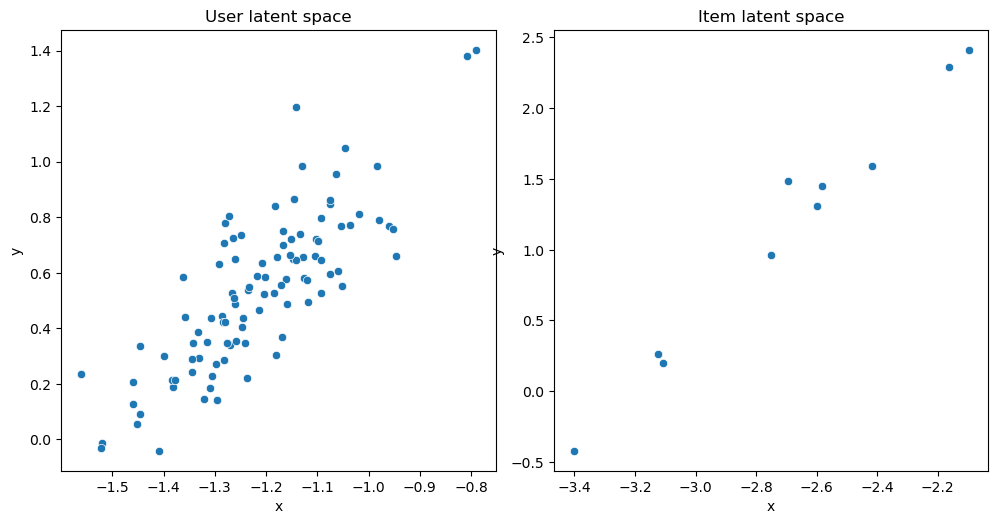

In [20]:
latent_pair = merged_train[["user_id", "V2_item"]].values
mf = MF(num_user, 10, K=2)
mf.fit(latent_pair, train_rating)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

plt.tight_layout()
sns.scatterplot(
    pd.DataFrame({"x": mf.P[:, 0], "y": mf.P[:, 1]}), x="x", y="y", ax=axes[0]
)
axes[0].set(title="User latent space")
sns.scatterplot(
    pd.DataFrame({"x": mf.Q[:, 0], "y": mf.Q[:, 1]}), x="x", y="y", ax=axes[1]
)
axes[1].set(title="Item latent space")

Fitting Reg-MF: K: 2, lam: 0.00100
Reg-MF: ite: 0; diff: 0.741 Obj: 4.819
Reg-MF: ite: 1; diff: 0.329 Obj: 3.234
Reg-MF: ite: 2; diff: 0.087 Obj: 2.954
Reg-MF: ite: 3; diff: 0.066 Obj: 2.759
Reg-MF: ite: 4; diff: 0.052 Obj: 2.616
Reg-MF: ite: 5; diff: 0.042 Obj: 2.507
Reg-MF: ite: 6; diff: 0.034 Obj: 2.421
Reg-MF: ite: 7; diff: 0.029 Obj: 2.352
Reg-MF: ite: 8; diff: 0.024 Obj: 2.295
Reg-MF: ite: 9; diff: 0.021 Obj: 2.247
Reg-MF: ite: 10; diff: 0.018 Obj: 2.207
Reg-MF: ite: 11; diff: 0.016 Obj: 2.172
Reg-MF: ite: 12; diff: 0.014 Obj: 2.143
Reg-MF: ite: 13; diff: 0.012 Obj: 2.117
Reg-MF: ite: 14; diff: 0.011 Obj: 2.094
Reg-MF: ite: 15; diff: 0.010 Obj: 2.074
Reg-MF: ite: 16; diff: 0.009 Obj: 2.056
Reg-MF: ite: 17; diff: 0.008 Obj: 2.040
Reg-MF: ite: 18; diff: 0.007 Obj: 2.026
Reg-MF: ite: 19; diff: 0.006 Obj: 2.013
Reg-MF: ite: 20; diff: 0.006 Obj: 2.001
Reg-MF: ite: 21; diff: 0.005 Obj: 1.991
Reg-MF: ite: 22; diff: 0.005 Obj: 1.982
Reg-MF: ite: 23; diff: 0.004 Obj: 1.973
Reg-MF: ite: 24

[Text(0.5, 1.0, 'Item latent space')]

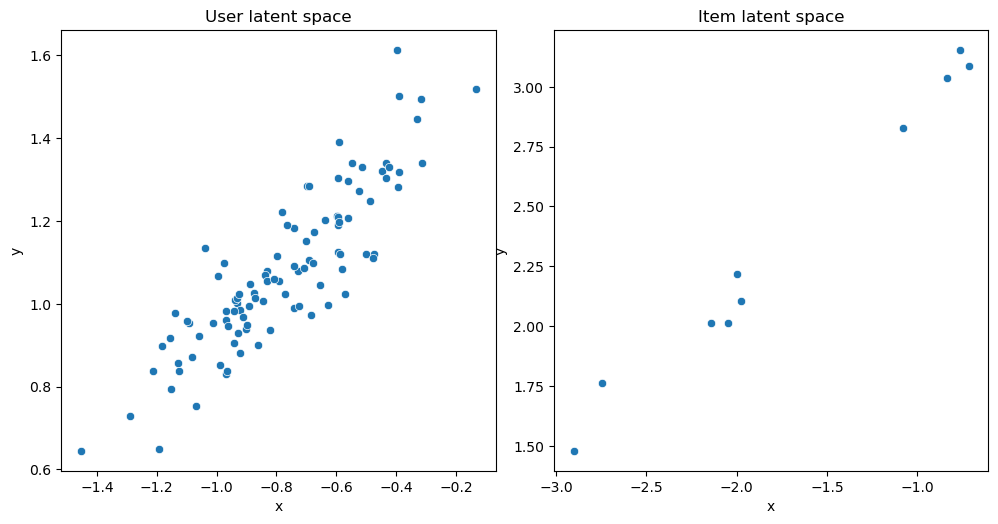

In [21]:
latent_pair = merged_train[["user_id", "V3_item"]].values
mf = MF(num_user, 10, K=2)
mf.fit(latent_pair, train_rating)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

plt.tight_layout()
sns.scatterplot(
    pd.DataFrame({"x": mf.P[:, 0], "y": mf.P[:, 1]}), x="x", y="y", ax=axes[0]
)
axes[0].set(title="User latent space")
sns.scatterplot(
    pd.DataFrame({"x": mf.Q[:, 0], "y": mf.Q[:, 1]}), x="x", y="y", ax=axes[1]
)
axes[1].set(title="Item latent space")

Fitting Reg-MF: K: 2, lam: 0.00100
Reg-MF: ite: 0; diff: 0.742 Obj: 5.205
Reg-MF: ite: 1; diff: 0.372 Obj: 3.269
Reg-MF: ite: 2; diff: 0.095 Obj: 2.959
Reg-MF: ite: 3; diff: 0.069 Obj: 2.754
Reg-MF: ite: 4; diff: 0.054 Obj: 2.606
Reg-MF: ite: 5; diff: 0.043 Obj: 2.494
Reg-MF: ite: 6; diff: 0.035 Obj: 2.406
Reg-MF: ite: 7; diff: 0.029 Obj: 2.335
Reg-MF: ite: 8; diff: 0.025 Obj: 2.277
Reg-MF: ite: 9; diff: 0.021 Obj: 2.229
Reg-MF: ite: 10; diff: 0.018 Obj: 2.188
Reg-MF: ite: 11; diff: 0.016 Obj: 2.153
Reg-MF: ite: 12; diff: 0.014 Obj: 2.123
Reg-MF: ite: 13; diff: 0.012 Obj: 2.097
Reg-MF: ite: 14; diff: 0.011 Obj: 2.074
Reg-MF: ite: 15; diff: 0.010 Obj: 2.053
Reg-MF: ite: 16; diff: 0.009 Obj: 2.035
Reg-MF: ite: 17; diff: 0.008 Obj: 2.019
Reg-MF: ite: 18; diff: 0.007 Obj: 2.005
Reg-MF: ite: 19; diff: 0.006 Obj: 1.992
Reg-MF: ite: 20; diff: 0.006 Obj: 1.981
Reg-MF: ite: 21; diff: 0.005 Obj: 1.970
Reg-MF: ite: 22; diff: 0.005 Obj: 1.961
Reg-MF: ite: 23; diff: 0.004 Obj: 1.952
Reg-MF: ite: 24

[Text(0.5, 1.0, 'Item latent space')]

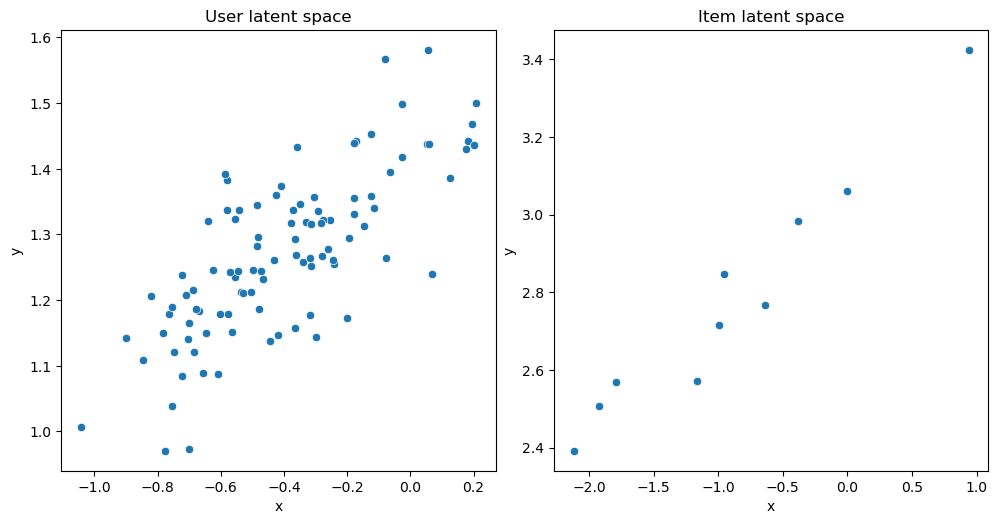

In [22]:
latent_pair = merged_train[["user_id", "V4_item"]].values
mf = MF(num_user, 10, K=2)
mf.fit(latent_pair, train_rating)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

plt.tight_layout()
sns.scatterplot(
    pd.DataFrame({"x": mf.P[:, 0], "y": mf.P[:, 1]}), x="x", y="y", ax=axes[0]
)
axes[0].set(title="User latent space")
sns.scatterplot(
    pd.DataFrame({"x": mf.Q[:, 0], "y": mf.Q[:, 1]}), x="x", y="y", ax=axes[1]
)
axes[1].set(title="Item latent space")

# Model Development


In [23]:
from keras.callbacks import TensorBoard

LOG_DIR = "tflogs"
MODEL_DIR = "models"


def get_tb_callback(model_name: str) -> TensorBoard:
    return TensorBoard(
        log_dir=os.path.join(LOG_DIR, model_name),
        histogram_freq=0,
        write_graph=True,
        write_images=False,
    )


metrics = [
    tf.keras.metrics.RootMeanSquaredError(name="rmse"),
]

callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_rmse",
        min_delta=0,
        patience=5,
        verbose=1,
        mode="auto",
        baseline=None,
        restore_best_weights=True,
    )
]

In [24]:
def gen_predictions(model, filename):
    prediction_df = pd.DataFrame({"rating": model.predict(merged_test_data).flatten()})
    prediction_df.index.names = ["Id"]
    prediction_df.to_csv(os.path.join("predictions", filename))

In [25]:
def MLPFactory(
    layer_sizes: list[int],
    activations: str | list[str | None] | None = "relu",
    dropouts: float | list[float | None] | None = None,
    batch_norm: bool = False,
):
    model = tf.keras.Sequential()
    if not isinstance(activations, list):
        activations = [activations] * (len(layer_sizes) - 1)
    if not isinstance(dropouts, list):
        dropouts = [dropouts] * (len(layer_sizes) - 1)
    for layer_num, (layer_size, activation, dropout) in enumerate(
        zip(layer_sizes[1:], activations, dropouts)
    ):
        if layer_num == 0:
            model.add(
                tf.keras.layers.Dense(
                    layer_size,
                    activation=activation,
                    input_shape=(layer_sizes[0],),
                    kernel_initializer=tf.keras.initializers.HeNormal(),
                )
            )
        else:
            model.add(
                tf.keras.layers.Dense(
                    layer_size,
                    activation=activation,
                    kernel_initializer=tf.keras.initializers.HeNormal(),
                )
            )
        if dropout:
            model.add(tf.keras.layers.Dropout(dropout))
        if batch_norm and layer_num != (len(activations) - 1):
            model.add(tf.keras.layers.BatchNormalization())
    return model


# mlp = MLPFactory([16, 16, 16, 1], ["relu", "relu", "linear"], True)

In [26]:
class GeneralTower(tf.keras.Model):
    def __init__(self, towers: dict[tuple, tf.keras.Model], mlp_model: tf.keras.Model):
        super().__init__()
        self.towers = towers
        self.flatten = tf.keras.layers.Flatten()
        self.concatenate = tf.keras.layers.Concatenate()
        self.mlp_model = mlp_model

    def call(self, inputs):
        tower_results = []
        for indices, tower in self.towers.items():
            tower_result = self.flatten(tower(tf.gather(inputs, indices, axis=1)))
            tower_results.append(tower_result)
        combined_tower_results = self.concatenate(tower_results)
        return self.mlp_model(combined_tower_results)

In [27]:
class MFNN(tf.keras.Model):
    def __init__(
        self,
        left_input_dim: int,
        right_input_dim: int,
        embedding_size: int,
        regularizer=tf.keras.regularizers.l2,
        reg_param: float = 1e-2,
    ):
        super().__init__()
        self.left_input_dim = left_input_dim
        self.right_input_dim = right_input_dim
        self.embedding_size = embedding_size
        self.regularizer = regularizer
        self.left_embedding = tf.keras.layers.Embedding(
            left_input_dim,
            embedding_size,
            embeddings_regularizer=self.regularizer(reg_param),
        )
        self.right_embedding = tf.keras.layers.Embedding(
            right_input_dim,
            embedding_size,
            embeddings_regularizer=self.regularizer(reg_param),
        )

    def call(self, inputs):
        left_vector = self.left_embedding(tf.gather(inputs, 0, axis=1))
        right_vector = self.right_embedding(tf.gather(inputs, 1, axis=1))
        return tf.tensordot(left_vector, right_vector, 2)

In [28]:
basic_mf = MFNN(num_user, num_item, 10)
basic_mf.build(input_shape=[None, merged_train_data.shape[-1]])
basic_mf.call(
    tf.keras.Input(
        shape=merged_train_data.shape[-1],
    )
)
print(basic_mf.summary())

Model: "mfnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10)                1000      
                                                                 
 embedding_1 (Embedding)     (None, 10)                3000      
                                                                 
Total params: 4000 (15.62 KB)
Trainable params: 4000 (15.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [29]:
basic_mf.compile(
    optimizer=tf.keras.optimizers.legacy.Adam(),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=metrics,
)

basic_mf.fit(
    train_pair,
    train_rating,
    batch_size=64,
    epochs=1000,
    verbose=2,
    validation_split=0.2,
    shuffle=True,
    callbacks=callbacks + [get_tb_callback("BasicMF")],
)

Epoch 1/1000


35/35 - 0s - loss: 17.0735 - rmse: 4.1286 - val_loss: 16.9019 - val_rmse: 4.1078 - 261ms/epoch - 7ms/step
Epoch 2/1000
35/35 - 0s - loss: 16.5905 - rmse: 4.0695 - val_loss: 16.9341 - val_rmse: 4.1111 - 36ms/epoch - 1ms/step
Epoch 3/1000
35/35 - 0s - loss: 16.0459 - rmse: 4.0011 - val_loss: 16.9261 - val_rmse: 4.1089 - 39ms/epoch - 1ms/step
Epoch 4/1000
35/35 - 0s - loss: 15.1966 - rmse: 3.8919 - val_loss: 16.7540 - val_rmse: 4.0859 - 41ms/epoch - 1ms/step
Epoch 5/1000
35/35 - 0s - loss: 13.7932 - rmse: 3.7043 - val_loss: 16.1622 - val_rmse: 4.0095 - 39ms/epoch - 1ms/step
Epoch 6/1000
35/35 - 0s - loss: 11.5868 - rmse: 3.3888 - val_loss: 14.7420 - val_rmse: 3.8233 - 45ms/epoch - 1ms/step
Epoch 7/1000
35/35 - 0s - loss: 8.5618 - rmse: 2.9009 - val_loss: 12.3461 - val_rmse: 3.4888 - 31ms/epoch - 889us/step
Epoch 8/1000
35/35 - 0s - loss: 5.3474 - rmse: 2.2686 - val_loss: 9.3594 - val_rmse: 3.0214 - 34ms/epoch - 969us/step
Epoch 9/1000
35/35 - 0s - loss: 3.0226 - rmse: 1.6637 - val_loss: 6

In [30]:
class MFPhi(tf.keras.Model):
    def __init__(self, mf, phi):
        super().__init__()
        self.mf = mf
        self.phi = phi

    def call(self, inputs):
        user_item = self.mf(tf.gather(inputs, [0, 1], axis=1))
        phi_output = self.phi(tf.gather(inputs, list(range(2, 12)), axis=1))
        return user_item + phi_output


user_item_interaction = MFNN(num_user, num_item, 10)
phi = MLPFactory([10, 5, 1])
mfphi = MFPhi(user_item_interaction, phi)
mfphi.build(input_shape=[None, merged_train_data.shape[-1]])
mfphi.call(
    tf.keras.Input(
        shape=merged_train_data.shape[-1],
    )
)
print(mfphi.summary())
mfphi.compile(
    optimizer=tf.keras.optimizers.legacy.Adam(),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=metrics,
)
mfphi.fit(
    merged_train_data,
    merged_train_rating,
    batch_size=64,
    epochs=1000,
    verbose=2,
    validation_split=0.3,
    shuffle=True,
    callbacks=callbacks + [get_tb_callback("MF+Phi")],
)

Model: "mf_phi"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mfnn_1 (MFNN)               ()                        4000      
                                                                 
 sequential (Sequential)     (None, 1)                 61        
                                                                 
Total params: 4061 (15.86 KB)
Trainable params: 4061 (15.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/1000
30/30 - 0s - loss: 13.9542 - rmse: 3.3624 - val_loss: 14.0023 - val_rmse: 3.7390 - 286ms/epoch - 10ms/step
Epoch 2/1000
30/30 - 0s - loss: 12.5991 - rmse: 3.5462 - val_loss: 12.9282 - val_rmse: 3.5921 - 30ms/epoch - 1ms/step
Epoch 3/1000
30/30 - 0s - loss: 11.1918 - rmse: 3.3412 - val_loss: 11.8334 - val_rmse: 3.4354 - 29ms/epoch - 952us/step
Epoch 4/1000
30/30 - 0s - loss: 9.6492 - rmse: 3.1004 - val

In [31]:
class MFPhi2(tf.keras.Model):
    def __init__(self, mf, phi, phi2):
        super().__init__()
        self.mf = mf
        self.phi = phi
        self.phi2 = phi2

    def call(self, inputs):
        user_item = self.mf(tf.gather(inputs, [0, 1], axis=1))
        phi_output = self.phi(tf.gather(inputs, list(range(2, 12)), axis=1))
        phi2_output = self.phi2(tf.gather(inputs, list(range(12, 22)), axis=1))
        return user_item + phi_output + phi2_output


user_item_interaction = MFNN(num_user, num_item, 10, tf.keras.regularizers.l1, 1e-1)
phi = MLPFactory([10, 5, 1], dropouts=0.2)
phi2 = MLPFactory([10, 5, 1], dropouts=0.2)
mfphi2 = MFPhi2(user_item_interaction, phi, phi2)
mfphi2.build(input_shape=[None, merged_train_data.shape[-1]])
mfphi2.call(
    tf.keras.Input(
        shape=merged_train_data.shape[-1],
    )
)
print(mfphi2.summary())
mfphi2.compile(
    optimizer=tf.keras.optimizers.legacy.Adam(),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=metrics,
)
mfphi2.fit(
    merged_train_data,
    merged_train_rating,
    batch_size=64,
    epochs=1000,
    verbose=2,
    validation_split=0.3,
    shuffle=True,
    callbacks=callbacks + [get_tb_callback("MF+Phi2")],
)

Model: "mf_phi2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mfnn_2 (MFNN)               ()                        4000      
                                                                 
 sequential_1 (Sequential)   (None, 1)                 61        
                                                                 
 sequential_2 (Sequential)   (None, 1)                 61        
                                                                 
Total params: 4122 (16.10 KB)
Trainable params: 4122 (16.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/1000
30/30 - 0s - loss: 19.7169 - rmse: 3.4445 - val_loss: 16.0573 - val_rmse: 3.6033 - 451ms/epoch - 15ms/step
Epoch 2/1000
30/30 - 0s - loss: 13.8321 - rmse: 3.5194 - val_loss: 12.0206 - val_rmse: 3.4088 - 37ms/epoch - 1ms/step
Epoch 3/1000
30/30 - 0s - loss: 11.1825 - rmse

In [32]:
gen_predictions(mfphi2, "mfphi2.csv")

86/86 [==============================] - 0s 379us/step


In [33]:
class MFPhi2Psi(tf.keras.Model):
    def __init__(self, mf, phi, phi2, psi):
        super().__init__()
        self.mf = mf
        self.phi = phi
        self.phi2 = phi2
        self.psi = psi

    def call(self, inputs):
        user_item = self.mf(tf.gather(inputs, [0, 1], axis=1))
        phi_output = self.phi(tf.gather(inputs, list(range(2, 12)), axis=1))
        phi2_output = self.phi2(tf.gather(inputs, list(range(12, 22)), axis=1))
        psi_output = self.psi(tf.gather(inputs, list(range(2, 22)), axis=1))
        return user_item + phi_output + phi2_output + psi_output


count = 2
user_item_interaction = MFNN(num_user, num_item, 10, tf.keras.regularizers.l2, 1e-1)
phi = MLPFactory([10, 5, 1], batch_norm=[True, True, False])
phi2 = MLPFactory([10, 5, 1], batch_norm=[True, True, False])
psi = MLPFactory([20, 8, 4, 1], batch_norm=[True, True, False])
mfphi2psi = MFPhi2Psi(user_item_interaction, phi, phi2, psi)
mfphi2psi.build(input_shape=[None, merged_train_data.shape[-1]])
mfphi2psi.call(
    tf.keras.Input(
        shape=merged_train_data.shape[-1],
    )
)
print(mfphi2psi.summary())
mfphi2psi.compile(
    optimizer=tf.keras.optimizers.legacy.Adam(),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=metrics,
)
mfphi2psi.fit(
    merged_train_data,
    merged_train_rating,
    batch_size=64,
    epochs=500,
    verbose=2,
    validation_split=0.2,
    shuffle=True,
    callbacks=callbacks + [get_tb_callback(f"MF+Phi2+Psi{count}")],
)

Model: "mf_phi2_psi"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mfnn_3 (MFNN)               ()                        4000      
                                                                 
 sequential_3 (Sequential)   (None, 1)                 81        
                                                                 
 sequential_4 (Sequential)   (None, 1)                 81        
                                                                 
 sequential_5 (Sequential)   (None, 1)                 257       
                                                                 
Total params: 4419 (17.26 KB)
Trainable params: 4375 (17.09 KB)
Non-trainable params: 44 (176.00 Byte)
_________________________________________________________________
None
Epoch 1/500
35/35 - 1s - loss: 9.1528 - rmse: 2.6109 - val_loss: 9.7764 - val_rmse: 3.0941 - 597ms/epoch - 17ms/step
Epoch 2/500
35/35 - 0s - los

In [34]:
gen_predictions(mfphi2psi, "mfphi2psi-3.csv")

86/86 [==============================] - 0s 460us/step


In [35]:
class MFPhi2PsiIn(tf.keras.Model):
    def __init__(self, mf, phi, phi2, psi, interaction):
        super().__init__()
        self.mf = mf
        self.phi = phi
        self.phi2 = phi2
        self.psi = psi
        self.interaction = interaction

    def call(self, inputs):
        user_item = self.mf(tf.gather(inputs, [0, 1], axis=1))
        phi_output = self.phi(tf.gather(inputs, list(range(2, 12)), axis=1))
        phi2_output = self.phi2(tf.gather(inputs, list(range(12, 22)), axis=1))
        psi_output = self.psi(tf.gather(inputs, list(range(2, 22)), axis=1))
        interaction_output = self.interaction(tf.gather(inputs, [0, 24], axis=1))
        return user_item + phi_output + phi2_output + psi_output + interaction_output


count = 2
user_item_interaction = MFNN(num_user, num_item, 10, tf.keras.regularizers.l2, 1e-1)
phi = MLPFactory([10, 5, 1], batch_norm=[True, True, False])
phi2 = MLPFactory([10, 5, 1], batch_norm=[True, True, False])
psi = MLPFactory([20, 8, 4, 1], batch_norm=[True, True, False])
interaction = MFNN(num_user, 10, 10, tf.keras.regularizers.l2, 1e-2)
mfphi2psiin = MFPhi2PsiIn(user_item_interaction, phi, phi2, psi, interaction)
mfphi2psiin.build(input_shape=[None, merged_train_data.shape[-1]])
mfphi2psiin.call(
    tf.keras.Input(
        shape=merged_train_data.shape[-1],
    )
)
print(mfphi2psiin.summary())
mfphi2psiin.compile(
    optimizer=tf.keras.optimizers.legacy.Adam(),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=metrics,
)
mfphi2psiin.fit(
    merged_train_data,
    merged_train_rating,
    batch_size=64,
    epochs=500,
    verbose=2,
    validation_split=0.2,
    shuffle=True,
    callbacks=callbacks + [get_tb_callback(f"MF+Phi2+Psi+In")],
)

Model: "mf_phi2_psi_in"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mfnn_4 (MFNN)               ()                        4000      
                                                                 
 sequential_6 (Sequential)   (None, 1)                 81        
                                                                 
 sequential_7 (Sequential)   (None, 1)                 81        
                                                                 
 sequential_8 (Sequential)   (None, 1)                 257       
                                                                 
 mfnn_5 (MFNN)               ()                        1100      
                                                                 
Total params: 5519 (21.56 KB)
Trainable params: 5475 (21.39 KB)
Non-trainable params: 44 (176.00 Byte)
_________________________________________________________________
None
Epoch 1/50

In [36]:
gen_predictions(mfphi2psiin, "mfphi2psiin.csv")

86/86 [==============================] - 0s 554us/step


In [37]:
# user_embedding = tf.keras.layers.Embedding(
#     num_user, 5, embeddings_regularizer=tf.keras.regularizers.l2()
# )
# item_embedding = tf.keras.layers.Embedding(
#     num_item, 5, embeddings_regularizer=tf.keras.regularizers.l2()
# )
# user_details_mlp = MLPFactory([2, 8, 4])
# item_details_mlp = MLPFactory([2, 8, 4])
# user_side_mlp = MLPFactory([10, 16, 4])
# item_side_embedding = tf.keras.layers.Embedding(
#     5, 3, embeddings_regularizer=tf.keras.regularizers.l2()
# )
# last_mlp = MLPFactory([25, 48, 8, 1])
# model = GeneralTower(
#     {
#         (0,): user_embedding,
#         (1,): item_embedding,
#         (2, 3): user_details_mlp,
#         (4, 5): item_details_mlp,
#         tuple(range(6, 16)): user_side_mlp,
#         (19,): item_side_embedding,
#     },
#     last_mlp,
# )
# model.build(input_shape=[None, merged_train_data.shape[-1]])
# model.call(
#     tf.keras.Input(
#         shape=merged_train_data.shape[-1],
#     )
# )
# print(model.summary())
# model.compile(
#     optimizer=tf.keras.optimizers.legacy.Adam(),
#     loss=tf.keras.losses.MeanSquaredError(),
#     metrics=metrics,
# )

# model.fit(
#     merged_train_data,
#     merged_train_rating,
#     batch_size=64,
#     epochs=1000,
#     verbose=2,
#     validation_split=0.2,
#     callbacks=callbacks + [get_tb_callback("TowerTest")],
# )

In [38]:
# pred_rating = model.predict(merged_test_data[:, [0, 1] + list(range(3, 21))]).flatten()
# print(pred_rating)
# print("rmse: %.3f" % np.sqrt(np.mean((pred_rating - merged_test_data[:, 2]) ** 2)))

# Result


In [ ]:
t = 560
row_user_id = test_data.loc[t - 1, "user_id"]
row_item_id = test_data.loc[t - 1, "item_id"]
prediction_pair = pd.DataFrame(
    {"user_id": [row_user_id] * num_item, "item_id": list(range(num_item))}
)
prediction_data = pd.merge(
    pd.merge(
        prediction_pair,
        user_feats_transformed,
        on="user_id",
    ),
    item_feats,
    on="item_id",
    suffixes=("", "_item"),
).values

prediction_model = mfphi2psi
predictions = pd.DataFrame(
    {
        "rating": [
            prediction_model.predict(prediction_data[i : i + 1, :])
            for i in range(num_item)
        ]
    }
)
predictions.index.names = ["item_id"]

1/1 [==============================] - 0s 9ms/step


In [ ]:
# t-th record
predictions.loc[row_item_id]

rating    0.05099
Name: 133, dtype: float64

In [ ]:
# top 5 preferred items
predictions.sort_values("rating", ascending=False).head(5)

,rating
item_id,
290,0.094011
43,0.089458
244,0.088105
227,0.086075
217,0.085819
